# Exploring the Opioid Epidemic
### Emma Price

In this file, I explore the effect of opioid use on different demographic data from the 2017 National Survey of Drug Use and Health (NSDUH) that I loaded, cleaned, and selected certain columns from in the [data_cleaning.ipynd](http://localhost:8888/notebooks/data_cleaning.ipynb) file. The aims of this notebook are to explore the data from NSDUH related to opioids (identified here as heroin, pain relievers, and oxycontin).

In [37]:
import pandas as pd
import numpy as np
import thinkstats2
from thinkstats2 import Hist, Pmf, Cdf, Jitter, RenderNormalCdf, RenderParetoCdf
import thinkplot

In [38]:
# This function is from the ThinkStats2e, all credit to 
# Allen Downey.

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d


In [7]:
# Load the modified NSDUH data
nsduh = pd.read_stata('nsduh.dta')

#### Just a reminder of what the data looks like and what each column is made of

In [8]:
nsduh.head()

,index,NEWRACE2,pnrnmflag,irsex,sexatract,AGE2,IREDUHIGHST2,irpnrnmage,herage,oxcnnmage,herflag,udpyhrpnr,pnrnmyr,udpypnr,abodher,SRCPNRNM2,pnranyyr,oxcnanyyr,iroxcnnmyr
0,0,White,0,1,1.0,65+,15.0,NaN,NaN,NaN,0,Neither,0,0,0,,0,0,0
1,1,Afr Am,0,1,1.0,35-49,15.0,NaN,NaN,NaN,0,Neither,0,0,0,,0,0,0
2,2,Asian,0,1,1.0,35-49,13.0,NaN,NaN,NaN,0,Neither,0,0,0,,0,0,0
3,3,Hisp,0,1,1.0,35-49,15.0,NaN,NaN,NaN,0,Neither,0,0,0,,0,0,0
4,4,White,0,2,1.0,65+,12.0,NaN,NaN,NaN,0,Neither,0,0,0,,0,0,0


#### Age of First (Mis)Use Comparison
One thing that I was interested in is the different in ages of when people started using (in the case of pain relievers and oxycontin, misusing) these opioids. I know that a lot of people have access to perscription opioids fairly early in life due surgeries and the like.

In [9]:
nsduh['herage'].describe()

count    1015.000000
mean       22.776355
std         7.392906
min        10.000000
25%        18.000000
50%        21.000000
75%        25.000000
max        57.000000
Name: herage, dtype: float64

In [10]:
nsduh['irpnrnmage'].describe()

count    569.000000
mean      25.246046
std       13.732451
min       11.000000
25%       16.000000
50%       20.000000
75%       30.000000
max       87.000000
Name: irpnrnmage, dtype: float64

In [11]:
nsduh['oxcnnmage'].describe()

count    407.000000
mean      22.439803
std       10.256594
min        8.000000
25%       16.000000
50%       18.000000
75%       26.000000
max       65.000000
Name: oxcnnmage, dtype: float64

This CDF illustrates how those who use heroin begin to do so a bit later in life than those who misuse pain relievers and oxycontin. Interstingly, the curve after that does straighten out more for pain reliever than for oxycontin, which could be due to differences in dosing for people of different ages.

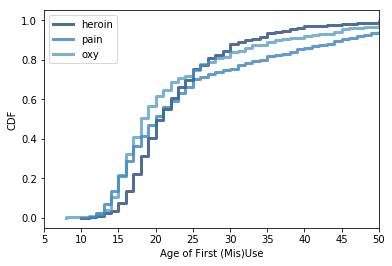

In [45]:
her_age_cdf = Cdf(nsduh['herage'], label='heroin')
pnr_age_cdf = Cdf(nsduh['irpnrnmage'], label='pain')
oxy_age_cdf = Cdf(nsduh['oxcnnmage'], label='oxy')

thinkplot.Cdf(her_age_cdf)
thinkplot.Cdf(pnr_age_cdf)
thinkplot.Cdf(oxy_age_cdf)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='CDF', xlim = [5,50])

This graphical comparison of ages got me curious about modeling these distributions. I thought that heroin first use age looked like a normal distribution, so I first tried plot that against a normal model, but found that there were some definite differences between those two. I then tried ploting the distribution against that a lognormal model. I found this plot to be much closer to the experimental distribution. It is interesting that this plot is so similar to a calculated model given that it is such a complex issue in the US today. Lognormal means that there are a number of independent and identically distributed factors causing the distribution, which is certainly true, but given that it follows so closely to this model makes me feel like intervention should be perhaps easier than a random model.

{'xscale': 'linear', 'yscale': 'linear'}

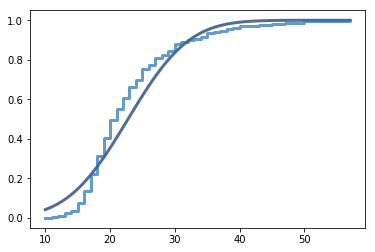

In [48]:
her_mu = nsduh['herage'].mean()
her_sigma = nsduh['herage'].std()
her_min = nsduh['herage'].min()
her_max = nsduh['herage'].max()

xs,ps = RenderNormalCdf(mu=her_mu, sigma=her_sigma,
                                   low = her_min, high = her_max)


thinkplot.Plot(xs, ps)
thinkplot.Cdf(her_age_cdf)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='CDF')

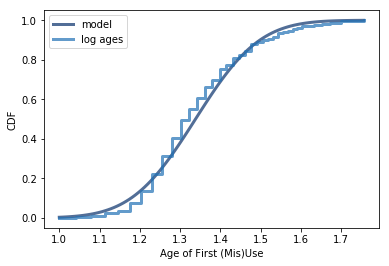

In [49]:
log_her_ages = np.log10(nsduh['herage'])
log_her_ages_cdf = Cdf(log_her_ages, label='log ages')

her_mu = log_her_ages.mean()
her_sigma = log_her_ages.std()
her_min = log_her_ages.min()
her_max = log_her_ages.max()

xs,ps = RenderNormalCdf(mu=her_mu, sigma=her_sigma,
                                   low = her_min, high = her_max)

thinkplot.Plot(xs, ps, label = 'model')
thinkplot.Cdf(log_her_ages_cdf)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='CDF')

I was also curious about the effect that education level and opioid abuse have on each other. If there is any effect, I think that it can go in both directions - that people with a lower education level are at a higher risk of abusing opioid and that those who do abuse opioids probably leave school at an earlier age.

In [50]:
her_users = nsduh[nsduh['herflag'] == 1]
pain_users = nsduh[nsduh['pnrnmflag'] == 1]
non_users = nsduh[(nsduh['herflag'] == 0) & (nsduh['pnrnmflag'] == 0)]

In [54]:
her_users['IREDUHIGHST2'].describe()

count    1029.000000
mean       12.267250
std         1.587741
min         5.000000
25%        12.000000
50%        12.000000
75%        13.000000
max        15.000000
Name: IREDUHIGHST2, dtype: float64

In [52]:
pain_users['IREDUHIGHST2'].describe()

count    5930.000000
mean       12.556661
std         2.073594
min         5.000000
25%        12.000000
50%        13.000000
75%        14.000000
max        15.000000
Name: IREDUHIGHST2, dtype: float64

In [53]:
non_users['IREDUHIGHST2'].describe()

count    50003.000000
mean        11.719537
std          2.753651
min          5.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         15.000000
Name: IREDUHIGHST2, dtype: float64

Interestingly, the mean of opioid users tips past earning a GED or high school diploma while non-users do not. It seems like this is mostly due to differences in the distributions below the median. The comparative CDF below seems to corroborate this. There is a definite overlap at the median, but below that amount, non-users seem to have a higher chance of dropping out and above that, heroin users.

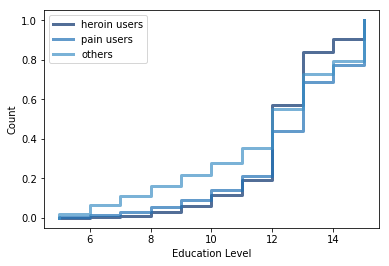

In [60]:
her_user_cdf = Cdf(her_users['IREDUHIGHST2'], label='heroin users')
pain_users_cdf = Cdf(pain_users['IREDUHIGHST2'], label='pain users')
non_users_cdf = Cdf(non_users['IREDUHIGHST2'], label='others')

thinkplot.Cdf(her_user_cdf)
thinkplot.Cdf(pain_users_cdf)
thinkplot.Cdf(non_users_cdf)
thinkplot.Config(xlabel='Education Level', ylabel='Count')

To get a better understanding of the effect size between opioid users and non-users, I checked the mean differences and Cohen Effect Size for both heroin and pain releivers. There is a larger difference between pain reliever users compared to heroin users. Which might be due to how heroin users typically use for the first time later in life that those abusing pain relievers, which likely would effect if they are able to complete school or not.

In [61]:
her_users['IREDUHIGHST2'].mean()-non_users['IREDUHIGHST2'].mean()

0.5477129292553435

In [62]:
CohenEffectSize(her_users['IREDUHIGHST2'], 
                non_users['IREDUHIGHST2'])

0.2002565895448763

In [63]:
pain_users['IREDUHIGHST2'].mean()-non_users['IREDUHIGHST2'].mean()

0.8371242177408647

In [64]:
CohenEffectSize(pain_users['IREDUHIGHST2'], 
                non_users['IREDUHIGHST2'])

0.31123191250392895

Given that there seems to be an effect due to heroin users, I decided to investigate the relationship to the age of first use and their education level. While the herion-use scatter plot does not seem to have a particularly noticeable relationship, the use of pain relievers has a very strong one. I had trouble using the correlation functions, so I will work on those and include them in the final hand-in.

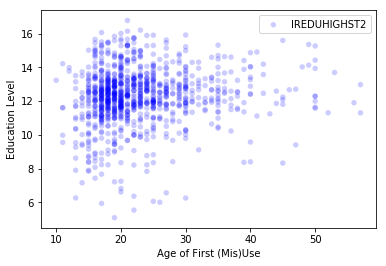

In [72]:
her_ages = her_users['herage']
her_educ = Jitter(her_users['IREDUHIGHST2'], 0.5)

thinkplot.Scatter(her_ages, her_educ)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='Education Level')

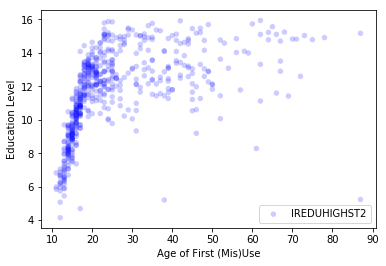

In [74]:
pain_ages = pain_users['irpnrnmage']
pain_educ = Jitter(pain_users['IREDUHIGHST2'], 0.5)

thinkplot.Scatter(pain_ages, pain_educ)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='Education Level')